In [2]:
!pip install fastcluster

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Jesus is Great!
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import single, ward, complete, average, cophenet
from scipy.spatial.distance import pdist, squareform
import fastcluster as fc

In [ ]:
## Importing the USArrests dataset

In [4]:
df=pd.read_csv("Downloads/USA5.csv")

In [7]:
Df=pd.DataFrame(df)

In [8]:
df.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Idaho,2.6,120,54,14.2
2,NewYork,11.1,254,86,26.1
3,Virginia,8.5,156,63,20.7
4,Rhode,3.4,174,87,8.3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     5 non-null      object 
 1   Murder    5 non-null      float64
 2   Assault   5 non-null      int64  
 3   UrbanPop  5 non-null      int64  
 4   Rape      5 non-null      float64
dtypes: float64(2), int64(2), object(1)
memory usage: 328.0+ bytes


In [11]:
# Making the column "State" as the index

In [12]:
df=df.set_index('State')
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Idaho,2.6,120,54,14.2
NewYork,11.1,254,86,26.1
Virginia,8.5,156,63,20.7
Rhode,3.4,174,87,8.3


In [13]:
#______Dendrogram

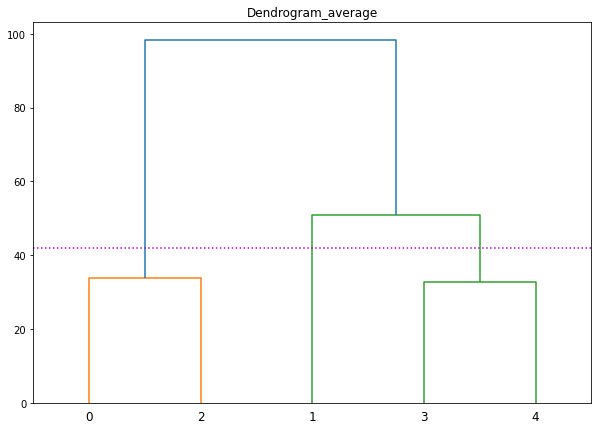

In [14]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrogram_average")  
dend = shc.dendrogram(shc.linkage(df, method='average'))
plt.axhline(y=42, color='m', linestyle=':') 



In [15]:
from scipy.spatial import distance_matrix
from scipy.spatial import distance
DM=pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, 
             columns=df.index)
round(DM, 2)

State,Alabama,Idaho,NewYork,Virginia,Rhode
State,,,,,
Alabama,0.00,116.76,33.71,80.30,70.34
Idaho,116.76,0.00,138.54,38.13,63.56
NewYork,33.71,138.54,0.00,100.84,82.32
Virginia,80.30,38.13,100.84,0.00,32.86
Rhode,70.34,63.56,82.32,32.86,0.00


In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

array([3, 2, 1, 0, 0], dtype=int64)

In [17]:
df['cluster'] = cluster.labels_

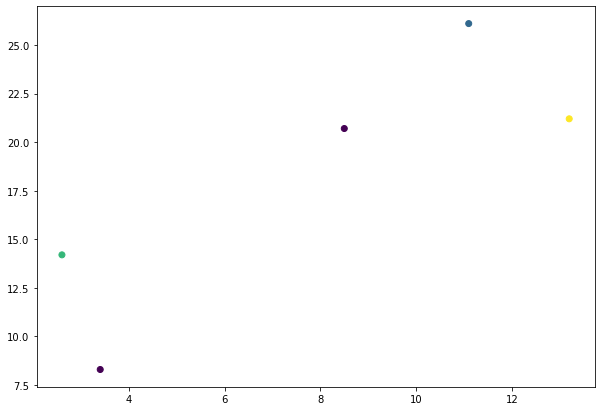

In [18]:
plt.figure(figsize=(10, 7))  
plt.scatter(df['Murder'], df['Rape'], c=cluster.labels_)

In [19]:
#____________________seaborn

Text(0.42499999999999716, 0.5, 'Rape')

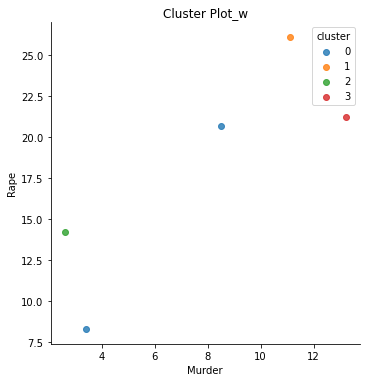

In [20]:
sns.lmplot(data=df, x='Murder', y='Rape', hue='cluster', 
                   fit_reg=False, legend=True, legend_out=False)
plt.title('Cluster Plot_w')
plt.xlabel('Murder')
plt.ylabel('Rape')

In [21]:
#_____________cophenetic corr_ward

In [22]:
from scipy.cluster.hierarchy import single, ward, complete, average, cophenet
from scipy.spatial.distance import pdist, squareform
import fastcluster as fc
import numpy as np

In [23]:
w = ward(pdist(df))
w 

array([[  3.        ,   4.        ,  32.85985393,   2.        ],
       [  0.        ,   2.        ,  33.77010512,   2.        ],
       [  1.        ,   5.        ,  57.51883749,   3.        ],
       [  6.        ,   7.        , 148.44695124,   5.        ]])

In [24]:
w_df =pd.DataFrame(w)
cophe_dists_w = cophenet(w)
cophe_dists_w
cophe_dists_w_df = pd.DataFrame(cophe_dists_w)

In [25]:
orign_dists_w = fc.pdist(df) 

In [26]:
# Calculating cophenetic correlation

In [27]:
corr_coef_w = np.corrcoef(orign_dists_w, cophe_dists_w)[0,1] 
corr_coef_w #0.82

0.825593795846236

In [28]:
#_____________________________below in one run

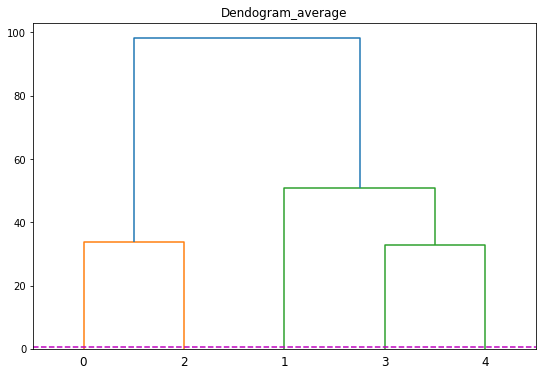

In [29]:
plt.figure(figsize=(9,6))
plt.title('Dendogram_average')
dend=shc.dendrogram(shc.linkage(df,method='average'))
plt.axhline(y=0.5,color='m',linestyle='--')

In [30]:
#____cophenetic correlation_______________AVERAGE

In [31]:
from scipy.cluster.hierarchy import single, ward, complete, average, cophenet
from scipy.spatial.distance import pdist, squareform
import fastcluster as fc
import numpy as np

In [32]:
a = average(pdist(df)) # dists at which clubbing happened
a 

array([[ 3.        ,  4.        , 32.85985393,  2.        ],
       [ 0.        ,  2.        , 33.77010512,  2.        ],
       [ 1.        ,  5.        , 50.89027114,  3.        ],
       [ 6.        ,  7.        , 98.20676865,  5.        ]])

In [33]:
a_df = pd.DataFrame(a)

In [34]:
cophe_dists_a = cophenet(a) 
cophe_dists_a

array([98.20676865, 33.77010512, 98.20676865, 98.20676865, 98.20676865,
       50.89027114, 50.89027114, 98.20676865, 98.20676865, 32.85985393])

In [35]:
cophe_dists_a_df = pd.DataFrame(cophe_dists_a)

In [36]:
orign_dists_a = fc.pdist(df) 

In [37]:
# Calculating cophenetic correlation

In [38]:
corr_coef_a = np.corrcoef(orign_dists_a, cophe_dists_a)[0,1] 
corr_coef_a #0.83

0.8265913396107949

In [39]:
#++++++++++++++++++++++++++++++++++++++++++++++++single

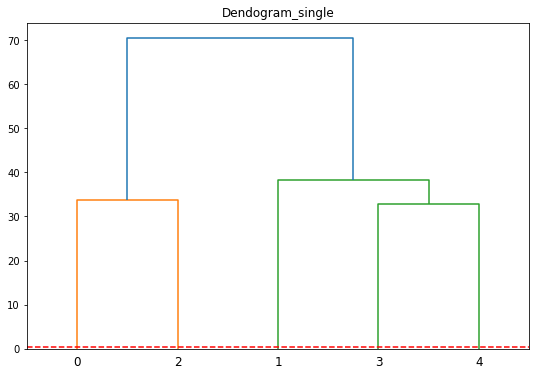

In [40]:
plt.figure(figsize=(9,6))
plt.title('Dendogram_single')
dend=shc.dendrogram(shc.linkage(df,method='single'))
plt.axhline(y=0.3,color='red',linestyle='--')

In [41]:
s = single(pdist(df))
s 

array([[ 3.        ,  4.        , 32.85985393,  2.        ],
       [ 0.        ,  2.        , 33.77010512,  2.        ],
       [ 1.        ,  5.        , 38.18455185,  3.        ],
       [ 6.        ,  7.        , 70.40205963,  5.        ]])

In [42]:
s_df =pd.DataFrame(s)

In [43]:
cophe_dists_s = cophenet(s) 
cophe_dists_s

array([70.40205963, 33.77010512, 70.40205963, 70.40205963, 70.40205963,
       38.18455185, 38.18455185, 70.40205963, 70.40205963, 32.85985393])

In [44]:
cophe_dists_s_df = pd.DataFrame(cophe_dists_s)

In [45]:
orign_dists_s = fc.pdist(df) 

In [46]:
# Calculating cophenetic correlation

In [47]:
corr_coef_s = np.corrcoef(orign_dists_s, cophe_dists_s)[0,1] 
corr_coef_s #0.7577

0.821672095871609

In [48]:
#++++++++++++++++++++++++++++++++++++++++++++++++complete

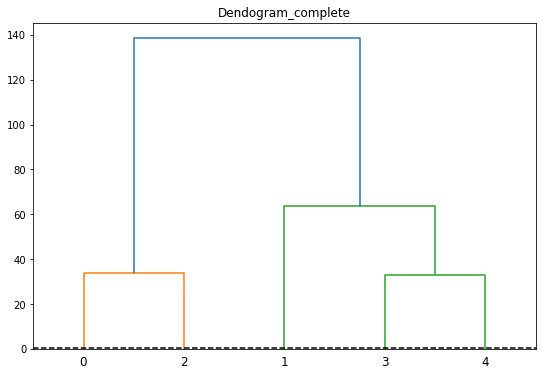

In [49]:
plt.figure(figsize=(9,6))
plt.title('Dendogram_complete')
dend=shc.dendrogram(shc.linkage(df,method='complete'))
plt.axhline(y=0.5,color='k',linestyle='--')

In [50]:
c = complete(pdist(df))
c 

array([[  3.        ,   4.        ,  32.85985393,   2.        ],
       [  0.        ,   2.        ,  33.77010512,   2.        ],
       [  1.        ,   5.        ,  63.59599044,   3.        ],
       [  6.        ,   7.        , 138.54551599,   5.        ]])

In [51]:
c_df =pd.DataFrame(c)
cophe_dists_c = cophenet(c) 

In [52]:
orign_dists_c = fc.pdist(df) 

In [53]:
# Calculating cophenetic correlation
corr_coef_c = np.corrcoef(orign_dists_c, cophe_dists_c)[0,1] 
corr_coef_c #0.81

0.8265056578217064

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Program Files\ancondapython\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Program Files\ancondapython\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Program Files\ancondapython\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Program Files\ancondapython\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connecti